In [3]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

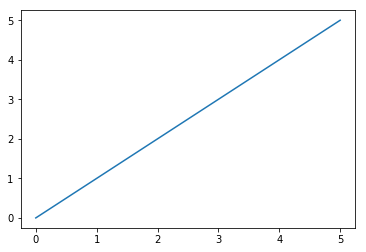

In [21]:
x_dist = np.arange(0, 6, 1)
plt.plot(x_dist)

### Sensores:
1. 02, 03, 04, 05 &rarr; frontais
2. 00, 01, 14, 15 &rarr; esquerdo
3. 06, 07, 08, 09 &rarr; direito
4. 10, 11, 12, 13 &rarr; traseiros

### Sensores para o Fuzzy:
1. Lado Esquerdo
    1. S1 &rarr; 03
    2. S2 &rarr; 02
    3. S3 &rarr; 01
    4. S4 &rarr; 00
2. Lado Direito
    1. S1 &rarr; 04
    2. S2 &rarr; 05
    3. S3 &rarr; 06
    4. S4 &rarr; 07

### Lógica Fuzzy:
O SFC representa um comportamento ao longo da parede. Quando o robô móvel se move em linha reta, o sub-controlador SFC manterá a distância fixa entre o robô e a parede, a fim de evitar a colisão ou a partida da parede. O LFC e o RFC representam os comportamentos de virar à esquerda e virar à direita. Quando o robô móvel se move para a esquerda ou para a direita, o sub-controlador LFC ou RFC também mantém a distância fixa entre o robô e a parede.

### SFC:
Quando o robô móvel está no processo de seguimento da parede, o importante é manter a distância fixa entre o robô móvel e a parede. O comportamento do controlador fuzzy baseado em reta (SFC) proposto depende dos valores de medição dos sensores 1 e 0 (ou seja, S3 e S4). O SFC proposto obtém as informações de distância e ângulo dos sensores 1 e 0. Quando o valor do sensor 1 diminui gradualmente, isso significa que o robô móvel se move em direção ao lado da parede. Nesse caso, o robô móvel precisa ser movido para longe da parede. Caso contrário, quando o valor do sensor 3 aumenta gradualmente, o robô móvel precisa ser movido em direção à parede.

### RFC:
O comportamento da curva à direita do RFC depende da distância (S4) entre o robô móvel e a parede. Se o valor da distância (S4) for grande, o robô móvel precisa virar à esquerda cedo para evitar ficar longe da parede no processo de curva à direita. Em oposição, se o valor da distância (S4) estiver próximo, o robô móvel mantém uma distância fixa da parede após a curva à direita.

### LFC:
O comportamento da curva à esquerda do controlador fuzzy (LFC) depende do ângulo de canto formado por duas paredes. Se o valor de S1 for menor que o valor de S3, o ângulo do canto será menor que 90 graus. Caso contrário, se o valor de S1 for maior que o valor de S3, o ângulo do canto será maior que 90 graus. Quando o ângulo é inferior a 90 graus, o robô móvel precisa virar à esquerda para evitar cair em uma zona morta. Ao contrário, quando o ângulo do canto é superior a 90 graus, o robô móvel mantém a distância fixa se movendo ao longo das paredes e precisa virar à esquerda ultimamente.

### Conjunto Fuzzy

#### Sensores SFC e LFC:
1. 0.0 - 1.5 &rarr; Perto
2. 1.0 - 2.0 &rarr; Desejável
3. 1.8 - 5.0 &rarr; Longe

#### Sensores RFC:
1. 0.0 - 2.5 &rarr; Perto
2. 2.2 - 5.0 &rarr; Longe

#### Velocidade Esquerda e Direita:
1. 0.0 - 1.3 &rarr; Devagar
2. 0.7 - 2.0 &rarr; Média
3. 1.7 - 2.5 &rarr; Rápido

In [108]:
x_dist = np.arange(0,6)
x_dist

array([0, 1, 2, 3, 4, 5])

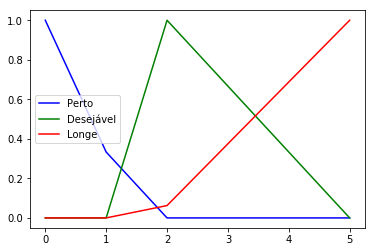

In [114]:
sfc_lfc_lo = fuzz.trimf(x_dist,[0,0,1.5])
sfc_lfc_md = fuzz.trimf(x_dist,[1.0,2.0,5])
sfc_lfc_lg = fuzz.trimf(x_dist,[1.8,5,5])

plt.plot(x_dist, sfc_lfc_lo, 'b', linewidth=1.5, label='Perto')
plt.plot(x_dist, sfc_lfc_md, 'g', linewidth=1.5, label='Desejável')
plt.plot(x_dist, sfc_lfc_lg, 'r', linewidth=1.5, label='Longe')
plt.legend()
plt.show()

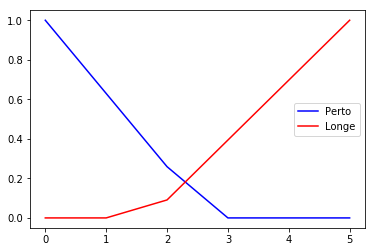

In [117]:
rfc_lo = fuzz.trimf(x_dist,[0,0,2.7])
rfc_lg = fuzz.trimf(x_dist,[1.7,5,5])

plt.plot(x_dist, rfc_lo, 'b', linewidth=1.5, label='Perto')
plt.plot(x_dist, rfc_lg, 'r', linewidth=1.5, label='Longe')
plt.legend()
plt.show()